# <center>CS570: Computer Vision</center>  <center>Fall 2021</center> 

Basic building blocks of keras are as follows: 

1. **Load dataset** 
    + difference between **flow**, **flow_from_directory** and **flow_from_dataframe**
    
2. **Define model**
    + difference between **sequential** and **functional** models 
    
3. **Compile model**

4. **Fit model**
    + difference between **fit** and **fit_generator** functions
    
5. **Evaluate model** 
    + difference between **evaluate** and **evaluate_generator** functions
    
6. **Predict model**
    + difference between **predict**, **predict_classes** and **predict_generator** functions

## 1: Load Datasets

Download and extract your dataset in a folder. Make sure your dataset folder has three subfolders train, val and test.



In [ ]:
train_data_dir = '/dataset/dogs-vs-cats/train/'
validation_data_dir = '/keras/dataset/dogs-vs-cats/val/'
test_dir = '/keras/dataset/dogs-vs-cats/test/'

Now, import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Keras ImageDataGenerator is used to 
+ take a batch of images from disk or memory.
+ apply random transformations to each image in the batch.
+ replace the original batch of images with a new randomly transformed batch.
+ train a deep learning model on this transformed batch.

For more information about ImageDataGenerator, see this [link](https://keras.io/preprocessing/image/). 

**Example of data augmentation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


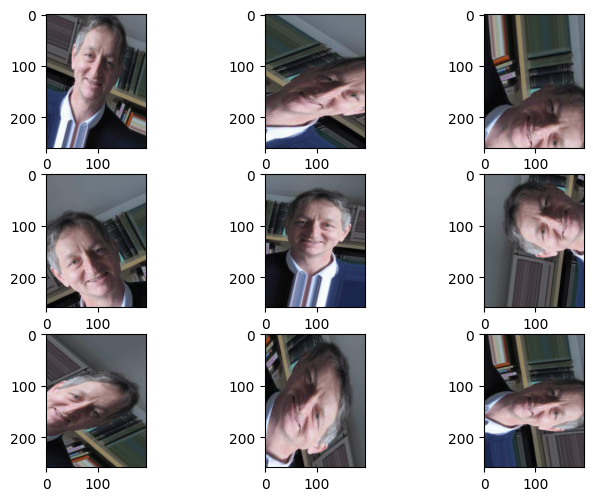

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

src_path = '/content/drive/My Drive/workshop/final/keras/dataset/hinton.jpg'

img = load_img(src_path)
data = img_to_array(img)
image = expand_dims(data, 0)

# define ImageDataGenerator class
data_augmentation = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True)

# apply ImageDataGenerator to input image
img_generator = data_augmentation.flow(image)

fig = figure(figsize=(8, 6), dpi=100)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = img_generator.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Once constructed, an iterator can be created for an image dataset.

Keras ImageDataGenerator class provides three different types of iterators to load the image dataset:

+ **flow()**:  an iterator that loads the complete image dataset in memory and generates batches of augmented images on each iteration.
+ **flow_from_directory()**: an iterator that loads a batch of images in memory from disk
+ **flow_from_dataframe()**: an iterator that loads a batch of images in memory from disk

The method **flow_from_directory()** assumes:

+ the root directory contains **three (3) folders** for **train**, **val**.and **test**.
+ the train folder should contain **k (number of classes)** sub-directories each containing images of respective classes.
+ the test folder should contain a single folder, which stores all **test images**.


In [ ]:
# define ImageDataGenerator class 
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True)

# define ImageDataGenerator class for testing images
test_datagen = ImageDataGenerator(rescale=1 /255.0)

# automatically retrieve images and their classes for train and validation sets
batch_size = 4
train_generator = train_datagen.flow_from_directory(
    directory=train_path, # directory must be set to the path where your ‘k’ classes of folders are present.
    target_size=(100, 100), # target_size is the size of your input images, every image will be resized to this size.
    color_mode="rgb", # grayscale or rgb
    batch_size=batch_size, # batch size
    class_mode="binary", # Set “binary” for two classes, set “categorical” for k classes and for regression task set “input”    
    shuffle=True, # want to shuffle images or not
    seed=42 # random seed for applying random image augmentation and shuffling the order of the image.
)

Found 90 images belonging to 2 classes.


In [ ]:
# for k number of classes
train_generator = train_datagen.flow_from_directory(
    directory=train_path, 
    target_size=(100, 100), 
    color_mode="rgb", 
    batch_size=batch_size, 
    class_mode="categorical",
    shuffle=True, 
    seed=42 
)

In [ ]:
# for specific classes
train_generator = train_datagen.flow_from_directory(
    directory=train_path, 
    target_size=(100, 100), 
    color_mode="rgb", 
    batch_size=batch_size, 
    classes=['class1','class2']
    class_mode="categorical",
    shuffle=True, 
    seed=42 
)

The method **flow_from_dataframe()** is useful when the images of different classes are reside in one folder.

In this case, the text file contains information about class labels. 
We make dataframe using pandas (library) and text file to classify images.

## 2. Define Model

There are two ways to build Keras models: sequential and functional. 

**Sequential Model**

The sequential API allows creating models layer-by-layer for most problems. It does not allow to create models that share layers or have multiple inputs or outputs.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=1))
#model.add(Dense())
model.add(Dense(1))

**Functional Model**

The functional API allows creating models where layers connect to more than just the previous and next layers. You can connect layers to any other layer. 

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

# Define the input
input_layer = Input(shape=(2,))  
# Connecting layers
hidden_layer = Dense(2)(input_layer)  
# Create the model
model = Model(inputs=input_layer, outputs=hidden_layer)

## 3. Compile Model

This step will create a Python object which builds the CNN. This is done by building the computation graph on the Keras backend.

In this step, we define loss function and type of optimizer.

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Now we have a Python object that has model and all its parameters with its initial values.

## 4. Fit Model

In this step we train the model so that the parameters get tuned to provide the correct outputs for a given input. This can be done by feeding the inputs at the input layer and then getting an output, calculate the loss function using the output and then use backpropagation to tune the model parameters. This step will **fit** the model parameters to the data.

There are two ways to fit the Keras model
#### 1. **fit()**

In [ ]:
model.fit(train_X, train_Y, batch_size=32, epochs=50) # pass complete training data (train_X, train_Y) at once in the fit function. 

This function is suitable for small datasets only. However, real-world data sets are usually too large to fit in memory. 

#### 2. **fit_generator()**

In [ ]:
model.fit_generator(
        train_generator, # (tuple) data (inputs, targets)
        epochs = 10, # (integer) number of rounds of data iteration
        verbose = 1, # verbose = 0 (silent), verbose = 1 (animated progress bar of current status), verbose = 2 (the no of epoch)
        callbacks = None, # 
        validation_data = None, # validation data tuple        
        class_weight = None, # define a dictionary with class labels and their associated weights cl_weight = {0: 1, 1: 50}.
        max_queue_size = 0, # maximum capacity of the generator queue
        workers = 1,
        use_multiprocessing = False,
        shuffle = True, 
        initial_epoch = 0) # start training from this epoch (used to continue training)

# steps_per_epoch is used to indicate that one epoch is completed. The value is usually set by dividing the total no of training 
# samples by the batch size. The result is no of steps per epoch we use. 

In **fit_generator()**, we don't pass the training data directly, instead they come from a generator. The fit_generator() function accepts the batch of data, performs backpropagation, and updates the weights in our model.

## 5. Evaluate Model

Evaluate your model using **evaluate()** and **evaluate_generator()** functions to evaluate the performance of network on the test dataset.

These functions will return a list with two values. The first will be the loss of the model and the second will be the accuracy of the model on the test dataset.

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model.evaluate_generator(test_generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

## 6. Make predictions 

Make predictions on the test dataset. The functions **predict()**, **predict_classes()** and **predict_generator()** are used
to make predictions on test dataset. 

- **predict()**  will return 0.6 class1 and 0.4 class2 
- **predict_classes()** will return the actual class. For example, class1
- **predict()**  will return the result value in case of regression

In [ ]:
# make probability predictions with the model
predictions = model.predict(X) # model.predict for regression problems
for i in range(len(X)):
    print("X=%s, Predicted=%s" % (X[i], predictions[i]))

# make the class predictions with the model
predictions = model.predict_classes(X) # model.predict for classification problems
for i in range(len(X)):
    print("X=%s, Predicted=%s" % (X[i], predictions[i]))

# How to save a Keras model?

Save model using **save()** function. This function make a single HDF5 file which contains:

+ the architecture of the model, allowing to re-create the model.
+ the weights of the model.
+ the training configuration (loss, optimizer).
+ the state of the optimizer, allowing to resume training exactly where you left off.

In [ ]:
model.save("model.h5")

# How to load a Keras model?

In [ ]:
from keras.models import load_model

model = load_model('model.h5')

# How to save weights after some epochs in Keras?

Deep learning models can take hours, days or even weeks to train. If the run is stopped unexpectedly, you can lose a lot of work. So, the ideal solution is to save weights after every or some epochs.

In keras ModelCheckpoint callback class helps us to save our model weights for each epoch. 

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath, # path to save the model file
                             monitor='val_accuracy', # 
                             verbose=1,  
                             save_best_only=False, # will save best weights only
                             save_weights_only=True, # if True (model.save_weights(filepath)) else save weights with model (model.save(filepath))
                             mode='auto', # {auto, min, max} 
                             period=10) # difference between two checkpoints
callbacks_list = [checkpoint]
# now use this checkpoint in step 4 (fit model)

# Split validation data automatically using Keras ImageDataGenerator

Use **validation_split** parameter that takes a floating-point number between 0 and 1, which is used to specify a certain proportion of data in the training set as the verification set. 

**validation_split** takes all input data and splits it between train and validation sets. 


In [ ]:
model.fit(train_X, train_Y, batch_size=16, epochs=10, verbose=2, validation_split=0.2) 

**validation_data** requires valX, valY explicitly. 

In [ ]:
model.fit(train_X, train_Y, validation_data=(testX,testY), epochs=10, batch_size=10)

How to split data in case of **ImageDataGenerator**?

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)